# Week 02 Assignment
## Data Exploration
Katie Greenler
- Exploring this dataset will lend insight into the land use policies that are determined under the LA County 2035 general plan. This information could be helpful for the project I pursue this quarter, and if for some reason it is not directly applicable then it can provide valuable context for future land use across the county.

In [1]:
# importing python libraries
import pandas as pd
import geopandas as gpd

In [7]:
# read and add geojson to notebook
policy = gpd.read_file('data/LandusePolicy2035.geojson')
policy

,OBJECTID,PLAN_,PLAN_LEG,COMM_NAME,LU_TYPE,ACRES,ShapeSTArea,ShapeSTLength,geometry
0,1,CG,CG - General Commercial,ALONDRA PARK,COMMERCIAL,6.787238,295650.910486,2914.533940,"POLYGON ((-118.32670 33.89059, -118.32670 33.8..."
1,2,CG,CG - General Commercial,ALONDRA PARK,COMMERCIAL,2.354595,102565.742051,2750.501420,"POLYGON ((-118.32670 33.89116, -118.32670 33.8..."
2,3,CG,CG - General Commercial,ALONDRA PARK,COMMERCIAL,7.500433,326717.561941,3065.093546,"POLYGON ((-118.32669 33.89817, -118.32669 33.8..."
3,4,CG,CG - General Commercial,ALONDRA PARK,COMMERCIAL,3.188267,138880.348300,1573.873971,"POLYGON ((-118.32674 33.89838, -118.32673 33.8..."
4,5,CG,CG - General Commercial,ALONDRA PARK,COMMERCIAL,1.454837,63372.450493,1128.599505,"POLYGON ((-118.32669 33.90025, -118.32669 33.9..."
...,...,...,...,...,...,...,...,...,...
5629,9822,MU,MU - Mixed Use,WEST WHITTIER - LOS NIETOS,MIXED USE,1.778699,77480.137322,1517.327981,"POLYGON ((-118.05557 33.98397, -118.05557 33.9..."
5630,9823,MU,MU - Mixed Use,WEST WHITTIER - LOS NIETOS,MIXED USE,1.648593,71812.700684,1078.262294,"POLYGON ((-118.05789 33.98478, -118.05745 33.9..."
5631,9824,MU,MU - Mixed Use,WEST WHITTIER - LOS NIETOS,MIXED USE,3.070539,133752.690248,1950.809951,"POLYGON ((-118.05879 33.98565, -118.05845 33.9..."
5632,9825,MU,MU - Mixed Use,WEST WHITTIER - LOS NIETOS,MIXED USE,0.662359,28852.367851,717.464904,"POLYGON ((-118.06430 33.98986, -118.06429 33.9..."


In [14]:
# begin exploration
# how many rows and columns? (shown above but doesn't hurt to practice)
policy.shape

(5634, 9)

In [15]:
# there are 9 columns meaning there are 9 attributes for each polygon
# next, its important to see what kind of data they hold

In [10]:
# dataframe info
policy.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   OBJECTID       5634 non-null   int64   
 1   PLAN_          5634 non-null   object  
 2   PLAN_LEG       5634 non-null   object  
 3   COMM_NAME      5634 non-null   object  
 4   LU_TYPE        5632 non-null   object  
 5   ACRES          5633 non-null   float64 
 6   ShapeSTArea    5634 non-null   float64 
 7   ShapeSTLength  5634 non-null   float64 
 8   geometry       5634 non-null   geometry
dtypes: float64(3), geometry(1), int64(1), object(4)
memory usage: 396.3+ KB


In [11]:
# data types
policy.dtypes

OBJECTID            int64
PLAN_              object
PLAN_LEG           object
COMM_NAME          object
LU_TYPE            object
ACRES             float64
ShapeSTArea       float64
ShapeSTLength     float64
geometry         geometry
dtype: object

In [16]:
# now I know what type of data I have to work with so I can look into more details before visualizing it

In [20]:
# I want to see the counts for each land use type
policy['LU_TYPE'].value_counts()

LU_TYPE
RESIDENTIAL               3810
COMMERCIAL                 468
OPEN SPACE                 428
PUBLIC AND SEMI-PUBLIC     300
RURAL                      289
INDUSTRIAL                 270
MIXED USE                   65
SPECIFIC PLAN                1
MILITARY                     1
Name: count, dtype: int64

In [21]:
# I think this is important information so I'll save it as a variable
LU_TYPE_count = policy['LU_TYPE'].value_counts()
LU_TYPE_count

LU_TYPE
RESIDENTIAL               3810
COMMERCIAL                 468
OPEN SPACE                 428
PUBLIC AND SEMI-PUBLIC     300
RURAL                      289
INDUSTRIAL                 270
MIXED USE                   65
SPECIFIC PLAN                1
MILITARY                     1
Name: count, dtype: int64

In [22]:
# what data type is LU_TYPE_count?
type(LU_TYPE_count)

pandas.core.series.Series

In [23]:
# now let's convert the series into a dataframe
LU_TYPE_count = LU_TYPE_count.reset_index()
LU_TYPE_count

,LU_TYPE,count
0,RESIDENTIAL,3810
1,COMMERCIAL,468
2,OPEN SPACE,428
3,PUBLIC AND SEMI-PUBLIC,300
4,RURAL,289
5,INDUSTRIAL,270
6,MIXED USE,65
7,SPECIFIC PLAN,1
8,MILITARY,1


In [24]:
type(LU_TYPE_count)

pandas.core.frame.DataFrame

<Axes: >

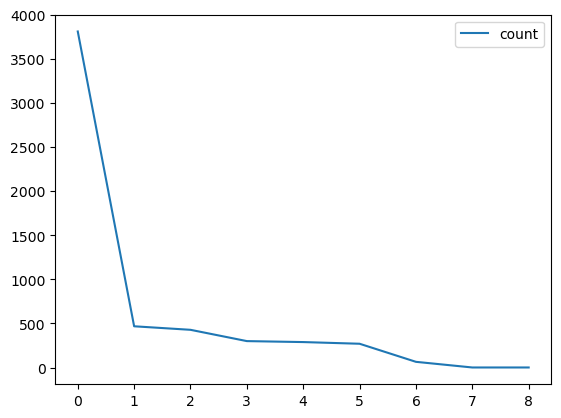

In [25]:
# simple bar chart
LU_TYPE_count.plot()

<Axes: title={'center': 'Land Use Types in LA County'}, xlabel='LU_TYPE'>

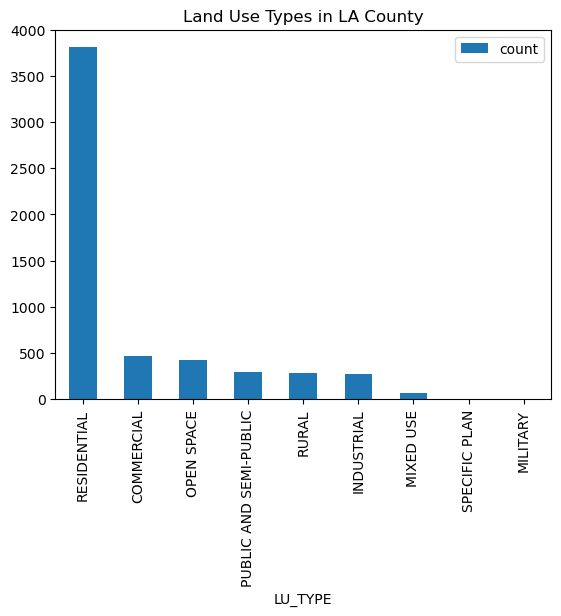

In [28]:
# this is not very helpful or easy to read
# to fix this, I'll give it additional features
LU_TYPE_count.plot.bar(x = 'LU_TYPE', y = 'count', title = 'Land Use Types in LA County')

In [31]:
# after all of these changes it is good to do a check of the data
# this is where I would save if I had trimmed the columns
# however I think all 9 columns provide potentially useful data and should not be deleted
policy.head()

,OBJECTID,PLAN_,PLAN_LEG,COMM_NAME,LU_TYPE,ACRES,ShapeSTArea,ShapeSTLength,geometry
0,1,CG,CG - General Commercial,ALONDRA PARK,COMMERCIAL,6.787238,295650.910486,2914.533940,"POLYGON ((-118.32670 33.89059, -118.32670 33.8..."
1,2,CG,CG - General Commercial,ALONDRA PARK,COMMERCIAL,2.354595,102565.742051,2750.501420,"POLYGON ((-118.32670 33.89116, -118.32670 33.8..."
2,3,CG,CG - General Commercial,ALONDRA PARK,COMMERCIAL,7.500433,326717.561941,3065.093546,"POLYGON ((-118.32669 33.89817, -118.32669 33.8..."
3,4,CG,CG - General Commercial,ALONDRA PARK,COMMERCIAL,3.188267,138880.348300,1573.873971,"POLYGON ((-118.32674 33.89838, -118.32673 33.8..."
4,5,CG,CG - General Commercial,ALONDRA PARK,COMMERCIAL,1.454837,63372.450493,1128.599505,"POLYGON ((-118.32669 33.90025, -118.32669 33.9..."


In [32]:
# I think it's interesting to look at commercial land use
# different land uses may prove to be more influential depending on the focus of my project (still up in the air)
policy[policy.LU_TYPE == 'COMMERCIAL']

,OBJECTID,PLAN_,PLAN_LEG,COMM_NAME,LU_TYPE,ACRES,ShapeSTArea,ShapeSTLength,geometry
0,1,CG,CG - General Commercial,ALONDRA PARK,COMMERCIAL,6.787238,295650.910486,2914.533940,"POLYGON ((-118.32670 33.89059, -118.32670 33.8..."
1,2,CG,CG - General Commercial,ALONDRA PARK,COMMERCIAL,2.354595,102565.742051,2750.501420,"POLYGON ((-118.32670 33.89116, -118.32670 33.8..."
2,3,CG,CG - General Commercial,ALONDRA PARK,COMMERCIAL,7.500433,326717.561941,3065.093546,"POLYGON ((-118.32669 33.89817, -118.32669 33.8..."
3,4,CG,CG - General Commercial,ALONDRA PARK,COMMERCIAL,3.188267,138880.348300,1573.873971,"POLYGON ((-118.32674 33.89838, -118.32673 33.8..."
4,5,CG,CG - General Commercial,ALONDRA PARK,COMMERCIAL,1.454837,63372.450493,1128.599505,"POLYGON ((-118.32669 33.90025, -118.32669 33.9..."
...,...,...,...,...,...,...,...,...,...
5338,6201,CG,CG - General Commercial,WILLOWBROOK,COMMERCIAL,0.131890,5745.102364,342.220844,"POLYGON ((-118.23052 33.93087, -118.23058 33.9..."
5339,6202,CG,CG - General Commercial,WILLOWBROOK,COMMERCIAL,0.224996,9800.797006,406.899949,"POLYGON ((-118.23076 33.93130, -118.23068 33.9..."
5552,6461,CG,CG - General Commercial,LADERA HEIGHTS / VIEWPARK - WINDSOR HILLS,COMMERCIAL,0.778188,33897.724120,749.239126,"POLYGON ((-118.35944 33.98861, -118.35934 33.9..."
5568,8156,CG,CG - General Commercial,WILLOWBROOK,COMMERCIAL,0.536926,23371.527539,972.235411,"POLYGON ((-118.24466 33.92917, -118.24466 33.9..."
